※본 커널은 캐글을 통해 공유된 "DJIA 30 Stock Time Series"(https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231/kernels) Dataset 의 Kernel 중 "Intro to Recurrent Neural Networks LSTM | GRU"(https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru) 의 내용을 기반으로 작성되었습니다.

## Colab 사용 환경

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/JK/TimeSeries/src

/content/gdrive/My Drive/JK/TimeSeries/src


In [3]:
pwd

'/content/gdrive/My Drive/JK/TimeSeries/src'

# 1 Aim and motivation

이 커널을 만들기 위해 선택한 주된 이유는 다양한 작업과 응용 프로그램에 RNN을 실습하고 사용하기 때문입니다. 첫 번째는 시계열 데이터입니다. RNN은 순차 데이터 예측 방식을 완전히 바꿔 놓았습니다. 여기서 목표는 kaggle에서 RNN에 대한 최고의 참조를 만드는 것입니다.

## Things to remember
* 이것이 마음에 들면, upvote 하고 이 커널을 공유하십시오. 이것은 가시성을 높이고 더 많은 사람들이 RNN의 위대함에 대해 배울 수 있게 됩니다.
* 이 커널에서는 keras를 사용합니다. keras 또는 신경망에 익숙하지 않은 경우이 커널 / 자습서 참조 : https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann
* 시계열에 대한 의심과 호기심은 여기에서 처리 할 수 ​​있습니다. : https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
* 설명이 당신을 위협하지 않도록하십시오. 생각보다 간단합니다.
* 결국 LSTM의 응용 프로그램을 더 추가 할 것입니다. 더 지켜봐 주시기 바랍니다!
* 이 코드는 Kirill Eremenko의 딥 러닝 과정에서 영감을 얻었습니다. : https://www.udemy.com/deeplearning/

# 2 Recurrent Neural Networks

## Recurrent Neural Networks
반복적인(recurrent) 신경망에서 네트워크의 하나 이상의 레이어로부터의 출력 활성화를 저장합니다. 종종 hidden layer activations 이 있습니다.(Often these are hidden later activations). 다음에 입력 예제를 네트워크에 공급할 때 이전에 저장된 출력을 추가 입력으로 포함시킵니다. 추가 입력은 이전 레이어에 대한 "정상"입력의 끝에 연결된 것으로 생각할 수 있습니다. 예를 들어, hidden layer 에 10 개의 정규 입력 노드와 128 개의 숨겨진 노드가 있는 경우 실제로는 다른 레이어가 아닌 138 개의 총 입력을 갖게됩니다 (레이어의 출력을 엘라 맨 자체에 공급한다고 가정). 물론, 처음으로 네트워크의 출력을 계산하려고 할 때 여분의 128 개의 입력을 0 또는 그 밖의 값으로 채워야합니다.

Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)
<img src="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png">

Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)

인터넷에서 찾은 반복 신경망에 대해 가장 좋은 설명을 제공하겠습니다.: 

https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s

이제 RNN은 매우 강력하지만 **Vanishing gradient 문제**로 인해 메모리가 과거 반복의 3-4 개 인스턴스를 저장하는 데는 좋지만 더 많은 수의 인스턴스는 좋지 않은 것처럼 장기 정보를 사용하지 못하게 됩니다. 일반 RNN 만 사용하지 않습니다. 대신, 우리는 더 나은 RNN 변형을 사용합니다 : **Long Short Term Networks (LSTM).**

### What is Vanishing Gradient problem?
Vanishing gradient 문제는 그라디언트 기반 학습 방법 및 역전파를 사용하여 인공 신경망을 훈련시키는 데 있어서의 어려움 입니다. 이러한 방법에서, 각각의 신경망의 가중치는 각 트레이닝 반복에서 현재 가중치에 대한 에러 함수의 부분 미분에 비례하는 업데이트를 수신한다. 문제는 경우에 따라 gradient가 vanishingly small 이라서 weight가 값을 갱신하지 못하게 하는 것입니다. 최악의 경우, 이것은 신경망의 추가 훈련을 완전히 중단시킬 수 있습니다. 문제 원인의 한 예로서, 쌍곡선 탄젠트 함수와 같은 기존의 활성화 함수는 범위 (0, 1)의 그래디언트를 가지며 역전파는 연쇄 규칙에 따라 그래디언트를 계산합니다. 이것은 n-계층 네트워크에서 "front"층의 gradient를 계산하기 위해 이들 작은 수의 n을 곱하는 효과를 가지며, 이는 gradient (오류 신호)가 n과 함께 기하 급수적으로 감소하는 반면, front 층은 매우 느리게 훈련됨을 의미한다.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

<img src="https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png">

Source: [Medium](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)

## Long Short Term Memory(LSTM)
LSTM (Long Short-Term Memory) units (또는 blocks)는 RNN (Recurrent Neural Network) layer의 구성 단위입니다. LSTM unit로 구성된 RNN을 종종 LSTM 네트워크라고 합니다. 공통 LSTM unit은 cell, input gate, output gate 및 forget gate로 구성됩니다. 셀은 임의의 시간 간격에 걸쳐 값을 "기억"합니다. 따라서 LSTM에서 "메모리"라는 단어가 사용됩니다. 3개의 게이트 각각은 다층 (또는 피드 포워드) 신경망에서와 같이 "conventional" 인공 뉴런으로 생각할 수 있습니다. 즉, 가중 합의 활성화(활성화 함수를 사용하여)를 계산합니다. 직관적으로, LSTM의 연결을 통과하는 값의 흐름을 조절하는 것으로 생각할 수 있습니다. 따라서 "gate"라는 표현이 있습니다. 이 게이트와 셀 사이에는 연결이 있습니다.

long short-term은 LSTM이 장기간 지속될 수 있는 단기 메모리의 모델이라는 사실을 나타냅니다. LSTM은 중요한 사건들 사이에 알려지지 않은 크기와 지속 시간의 시차가 주어지면 시계열을 분류, 처리 및 예측하는 데 적합합니다. LSTM은 전통적인 RNN을 훈련할 때 exploding 및 vanishing gradient 문제를 해결하기 위해 개발되었습니다.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

더 깊은 통찰력에 대해서는 위의 링크를 참조하십시오.

## Components of LSTMs
So the LSTM cell contains the following components
* Forget Gate “f” ( a neural network with sigmoid)
* Candidate layer “C"(a NN with Tanh)
* Input Gate “I” ( a NN with sigmoid )
* Output Gate “O”( a NN with sigmoid)
* Hidden state “H” ( a vector )
* Memory state “C” ( a vector)

* Inputs to the LSTM cell at any step are X<sub>t</sub> (current input) , H<sub>t-1</sub> (previous hidden state ) and C<sub>t-1</sub> (previous memory state).  
* Outputs from the LSTM cell are H<sub>t</sub> (current hidden state ) and C<sub>t</sub> (current memory state)

## Working of gates in LSTMs
먼저, LSTM 셀은 이전 메모리 상태 C<sub>t-1</sub>를 취하고 현재 메모리 상태 C<sub>t</sub>인지를 결정하기 위해 forget gate (f) 게이트를 요소 단위로 곱한다. forget gate 값이 0 이면 이전 메모리 상태를 완전히 잊혀지고, f forget gate 값이 1 이면 이전 메모리 상태를 셀로 완전히 전달합니다. (f 게이트는 0과 1 사이의 값을 제공합니다).

**C<sub>t</sub> = C<sub>t-1</sub> * f<sub>t</sub>**

Calculating the new memory state: 

**C<sub>t</sub> = C<sub>t</sub> + (I<sub>t</sub> * C\`<sub>t</sub>)**

Now, we calculate the output:

**H<sub>t</sub> = tanh(C<sub>t</sub>)**

# 3 LSTM

## 3.1 Import and Function

2017 년 IBM의 주식 가격을 예측하기 위해 LSTM을 사용합니다.

In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# Some functions to help out with

def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [0]:
def plot_metrics(history):
    metrics_df = pd.DataFrame(data={"loss": history.history['loss']})
    metrics_df.plot()

## 3.2 Data set

In [8]:
# First, we get the data
dataset = pd.read_csv('../input/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [0]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

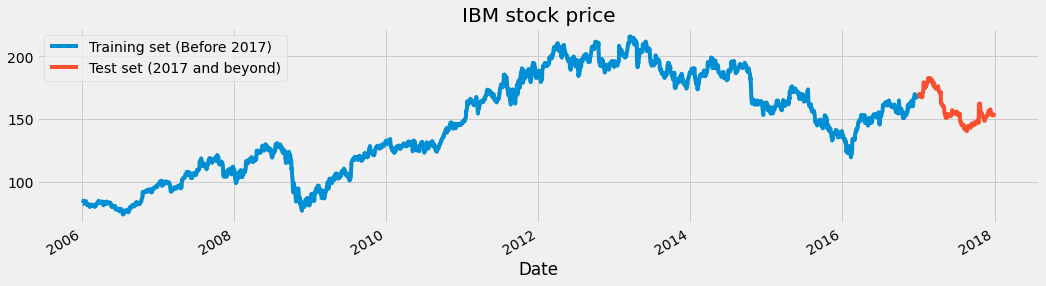

In [10]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [0]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## 3.3 Model

In [14]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



## 3.4 Training

In [15]:
# Fitting to the training set
history = regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





2709/2709 [==============================] - 19s 7ms/step - loss: 0.0260
Epoch 2/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0124
Epoch 3/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0085
Epoch 4/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0073
Epoch 5/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0065
Epoch 6/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0056
Epoch 7/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0052
Epoch 8/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0047
Epoch 9/50
2709/2709 [==============================] - 17s 6ms/step - loss: 0.0043
Epoch 10/50
2709/2709 [==============================] - 16s 6ms/step - loss: 0.0041
Epoch 11/50
2709/2709 [==============================] - 

In [0]:
regressor.save_weights('../models/lstm_weight.h5', overwrite=True)

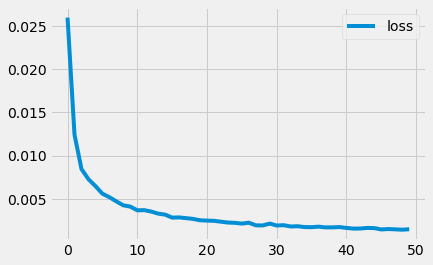

In [17]:
plot_metrics(history)

## 3.5 Prediction

In [0]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [0]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

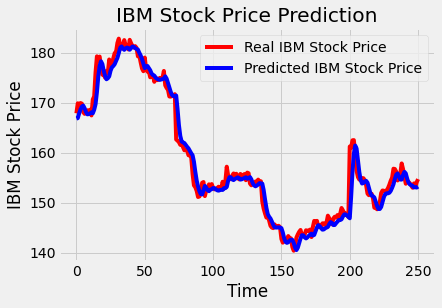

In [20]:
# Visualizing the results for LSTM
plot_predictions(test_set, predicted_stock_price)

In [21]:
# Evaluating our model
return_rmse(test_set, predicted_stock_price)

The root mean squared error is 2.0859556263103034.


## 3.6 Just shift(1) prediction

단순히 전일 가격을 익일의 예측치로 사용하는 경우의 rmse 를 구해본다.

In [0]:
tmp_test_set = test_set.reshape(-1)

# shift(1) 을 사용하여 prediction
predicted_test_shift = pd.Series(tmp_test_set).shift(1)
predicted_test_shift = predicted_test_shift.tolist()
predicted_test_shift[0] = tmp_test_set[0]

In [40]:
return_rmse(tmp_test_set, predicted_test_shift)

The root mean squared error is 1.5372411517279048.


# 4 GRU (Gated Recurrent Units)

LSTM은 폭풍처럼 딥 러닝의 세계를 점유한 유일한 종류의 장치가 아닙니다. **GRU (Gated Recurrent Units)**가 있습니다. GRU 또는 LSTM은 비슷한 성능을 가지고 있다고 알려져 있습니다. GRU는 LSTM보다 교육하기가 더 쉽습니다.


간단히 말해, GRU 장치는 LSTM 장치와 같은 정보의 흐름을 제어하기 위해 메모리 장치를 사용할 필요가 없습니다. 제어없이 모든 숨겨진 상태를 직접 사용할 수 있습니다. GRU는 더 적은 매개 변수를 가지므로 일반화하기 위해 조금 더 빨리 훈련하거나 더 적은 데이터가 필요할 수 있습니다. 그러나 데이터가 크면 표현력이 높은 LSTM이 더 나은 결과를 가져올 수 있습니다.

재설정 게이트와 업데이트 게이트라는 두 개의 게이트가 있다는 점을 제외하면 LSTM과 거의 유사합니다. 리셋 게이트는 새로운 입력을 이전 메모리에 결합하는 방법을 결정하고, 업데이트 게이트는 이전 상태를 얼마나 유지할지를 결정합니다. GRU의 업데이트 게이트는 LSTM의 입력 게이트 및 망각 게이트 입니다. 출력을 계산하기 전에 GRU에 2차 비선형성(second non linearity)이 없으며 출력 게이트도 없습니다.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195">

In [41]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
2709/2709 [==============================] - 8s 3ms/step - loss: 0.1459
Epoch 2/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0344
Epoch 3/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0081
Epoch 4/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0046
Epoch 5/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0039
Epoch 6/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0036
Epoch 7/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 8/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 9/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 10/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0030
Epoch 11/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0030
Epoch 12/50
2709/2709 [==============================] - 5s 2ms/step - loss: 0.0029
E

In [0]:
regressorGRU.save_weights('../models/gru_weight.h5', overwrite=True)

현재 버전은 이전 버전에서 50 개의 unit가 있는 GRU 네트워크와 달리 100 개의 unit 가 있는 dense GRU 네트워크를 사용합니다.

In [0]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

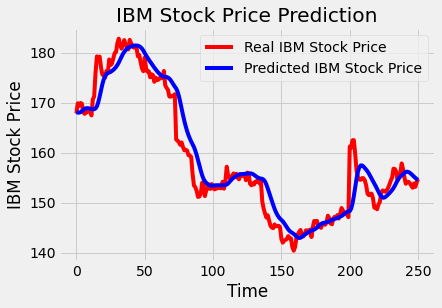

In [44]:
# Visualizing the results for GRU
plot_predictions(test_set,GRU_predicted_stock_price)

In [45]:
# Evaluating GRU
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 3.383726992535627.


# 5 Sequence Generation

여기서는 새로운 예측마다 마지막 60 개의 값을 사용하는 대신 초기 60 개의 값만 사용하여 시퀀스를 생성합니다. **테스트 세트 값을 사용하는 예측에 대한 다양한 의견의 의심으로 인해 시퀀스 생성을 포함하기로 결정했습니다.** 위의 모델은 테스트 세트를 사용하므로 새 값을 예측하기 위해 마지막 60 개의 실제 값을 사용하고 있습니다 (벤치 마크라고 함). 이것이 오류가 너무 낮은 이유입니다. 강력한 모델은 시퀀스에 대한 위의 모델과 유사한 결과를 가져올 수 있지만 이전 값을 가진 데이터 이상이 필요합니다. 주식의 경우 시장의 정서, 다른 주식의 움직임 등을 알아야 합니다. 따라서 원격으로 정확한 plot을 기대하지 마십시오. 오류는 크며 테스트 세트와 비슷한 추세를 생성하는 것이 가장 좋습니다.

예측에 GRU 모델을 사용하겠습니다. LSTM을 사용하여 시도할 수도 있습니다. 최상의 시퀀스를 얻기 위해 위의 GRU 모델을 수정했습니다. 모델을 4 번과 2 번 실행했는데 약 8 ~ 9의 오류가 발생했습니다. 최악의 경우 약 11의 오류가 발생했습니다.이 반복이 무엇인지 봅시다.

이전 버전의 GRU 모델도 좋습니다. 좋은 sequence를 얻으려면 약간의 조정이 필요했습니다. **이 커널의 주요 목표는 RNN 모델을 작성하는 방법을 보여주는 것입니다. 데이터를 예측하는 방법과 예측하는 데이터 종류는 귀하에게 달려 있습니다. 훈련과 테스트 세트의 목적지를 정하고 세계적 수준의 결과를 얻는 100 줄의 코드를 줄 수는 없습니다. 그것은 당신이해야 할 일입니다.**



In [60]:
X_train.shape

(2709, 60, 1)

In [0]:
# Preparing sequence data
initial_sequence = X_train[2708,:]
sequence = []
for i in range(251):
    new_prediction = regressorGRU.predict(initial_sequence.reshape(initial_sequence.shape[1],initial_sequence.shape[0],1))
    initial_sequence = initial_sequence[1:]
    initial_sequence = np.append(initial_sequence, new_prediction,axis=0)
    sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251,1))

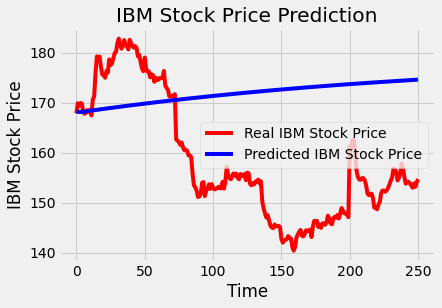

In [59]:
# Visualizing the sequence
plot_predictions(test_set,sequence)

In [48]:
# Evaluating the sequence
return_rmse(test_set,sequence)

The root mean squared error is 19.06830825117668.


따라서이 경우 GRU가 LSTM보다 잘 작동합니다. 양방향 LSTM도 좋은 방법이므로 모델을 더 강력하게 만드십시오. 그러나 이것은 데이터 세트마다 다를 수 있습니다. **LSTM과 GRU를 함께 적용하면 더 나은 결과를 얻을 수있었습니다.**

#### LSTM을 사용하여 텍스트 생성을 다루려고했지만 이미 언급 한 주제에 대해 [Shivam Bansal](https://www.kaggle.com/shivamb)의 훌륭한 커널이 있습니다. 해당 커널에 대한 링크: https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms

#### This is certainly not the end. Stay tuned for more stuff!